In [50]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [51]:
# Loading the Train dataset
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Loading the Test dataset
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Some Numerical Information about the Data

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [56]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [57]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Preprocessing

In [59]:
# Drop unnecessary columns from train and test 
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [60]:
# Fill in missing values
train.fillna({'Embarked': 'S'}, inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [61]:
# Fill in missing values of Age column based on Embarked 
train["Age"] = train.groupby("Embarked")["Age"].transform(lambda x: x.fillna(x.median()))
test["Age"] = test.groupby("Embarked")["Age"].transform(lambda x: x.fillna(x.median()))

In [62]:
# creating age groups 
train['Age'] = pd.cut(train['Age'], bins=[0, 5, 20, 25, 30, 40, 50, 60, 100], labels = ['0-5', '5-20', '20-25', '25-30','30-40', '40-50', '50-60', '+60'])
test['Age'] = pd.cut(test['Age'], bins=[0, 5, 20, 25, 30, 40, 50, 60, 100], labels = ['0-5', '5-20', '20-25', '25-30', '30-40', '40-50', '50-60', '+60'])

In [63]:
# Reduce unique values of SibSp Column
train['SibSp'] = train['SibSp'].apply(lambda x : 7 if x in range(5, 9) else x)
test['SibSp'] = test['SibSp'].apply(lambda x : 7 if x in range(5, 9) else x)
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
7     12
Name: count, dtype: int64

In [64]:
# Reduce unique values of Parch Column
train['Parch'] = train['Parch'].apply(lambda x : 5 if x in range(3, 10) else x)
test['Parch'] = test['Parch'].apply(lambda x : 5 if x in range(3, 10) else x)
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5     15
Name: count, dtype: int64

## Data Visualization

In [65]:
# Define list of Categorical columns Names
categorical = ['Survived', 'Sex', 'Embarked', 'Age']

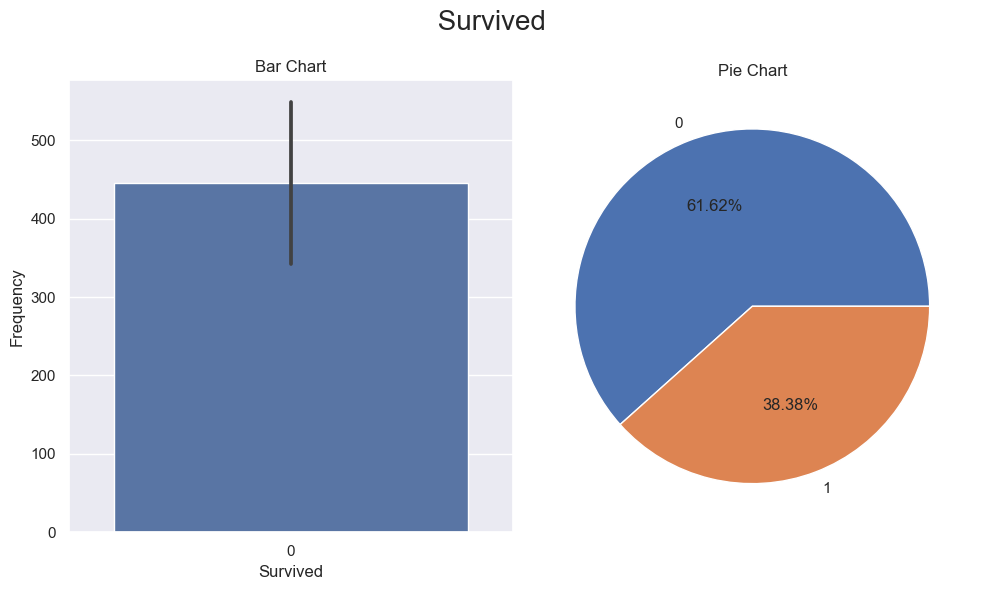

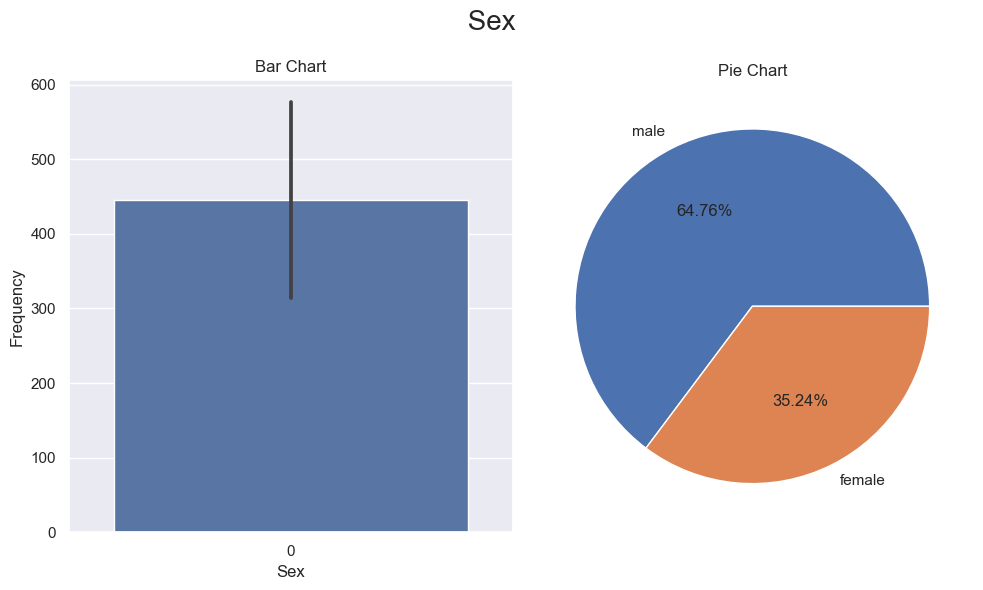

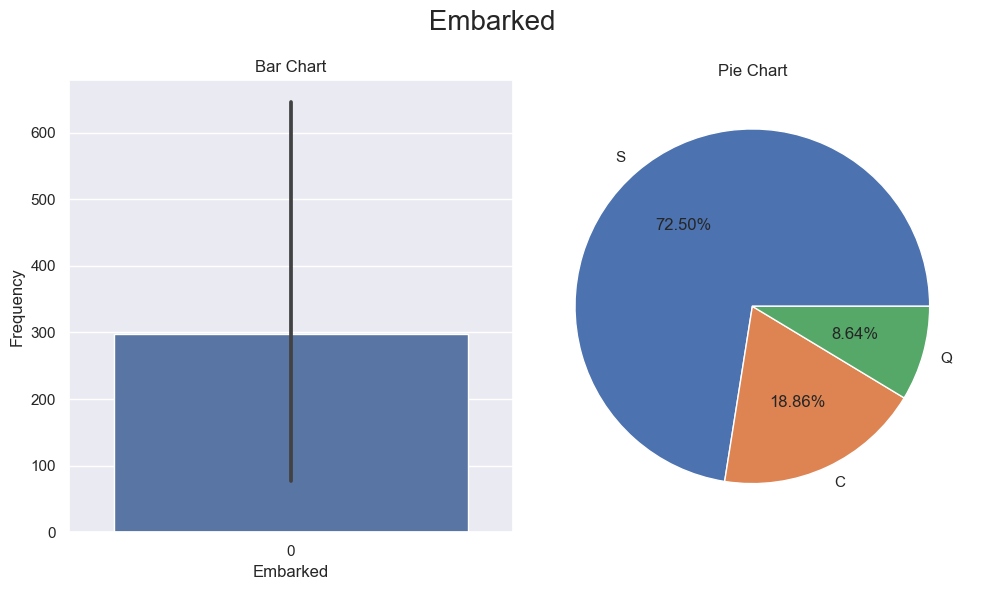

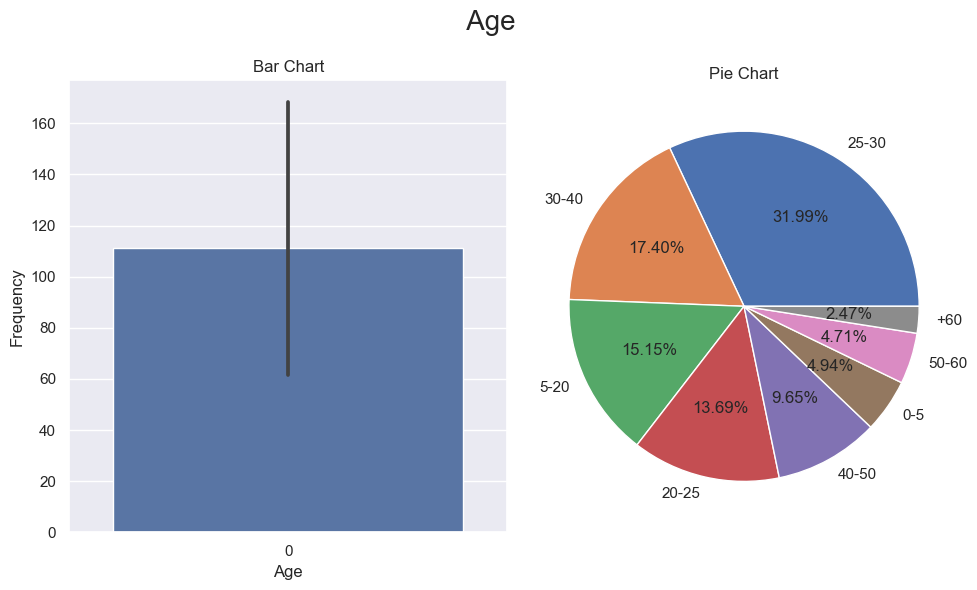

In [66]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Frequency')
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)

    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(train, cat)

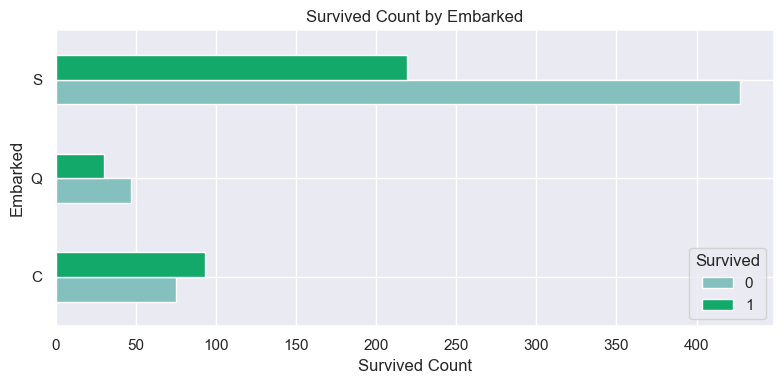

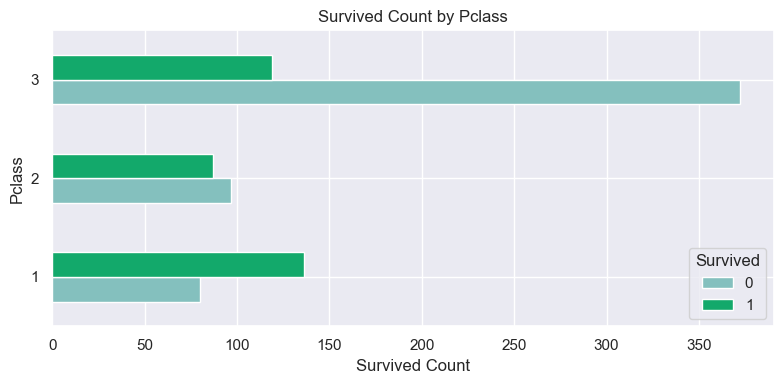

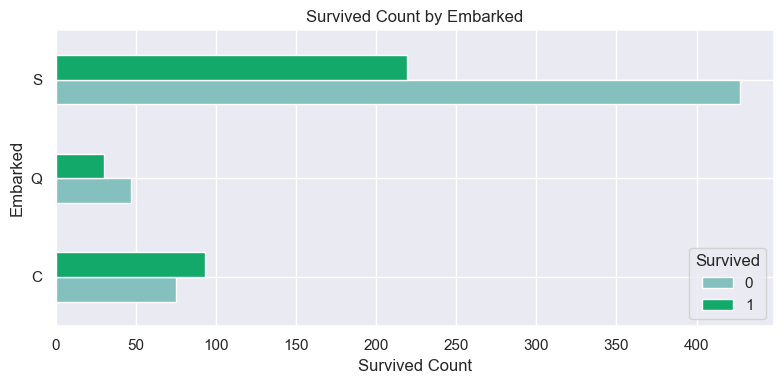

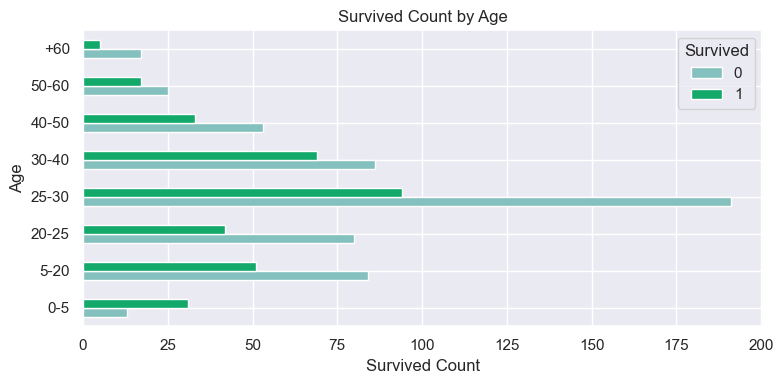

In [67]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Embarked', 'Survived', train)
bar_plot('Pclass', 'Survived', train)
bar_plot('Embarked', 'Survived', train)
bar_plot('Age', 'Survived', train)

## Data Preprocessing

In [68]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

le_cols = ['Sex']
stc_cols = ['Fare']
dum_cols = ['Age', 'Pclass','Embarked']

def preprocessing(df):
    # Apply Standard Scaler to the selected columns
    df[stc_cols] = stc.fit_transform(df[stc_cols])

    # Apply Label Encoder to the selected column
    for col in le_cols :
        df[col] = le.fit_transform(df[col])

    # Apply get_dummies to the Selected columns
    df = pd.get_dummies(df, columns=dum_cols)
    return df 

train = preprocessing(train)
test = preprocessing(test)

In [69]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,Age_0-5,Age_5-20,Age_20-25,Age_25-30,Age_30-40,Age_40-50,Age_50-60,Age_+60,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,0,-0.502445,False,False,True,False,False,False,False,False,False,False,True,False,False,True
1,1,0,1,0,0.786845,False,False,False,False,True,False,False,False,True,False,False,True,False,False
2,1,0,0,0,-0.488854,False,False,False,True,False,False,False,False,False,False,True,False,False,True
3,1,0,1,0,0.420730,False,False,False,False,True,False,False,False,True,False,False,False,False,True
4,0,1,0,0,-0.486337,False,False,False,False,True,False,False,False,False,False,True,False,False,True


## Training and Evaluating Different Models

In [70]:
from sklearn.model_selection import train_test_split 

x = train.drop(['Survived'], axis=1)
y = train['Survived']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.12, random_state=1242)

In [71]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [72]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier()),
    ('LGBM Classifier', LGBMClassifier(verbose=-1)), 
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.889030612244898
Test accuracy: Gradient Boosting 0.897196261682243

Training accuracy: Random Forest 0.9502551020408163
Test accuracy: Random Forest 0.8785046728971962

Training accuracy: Decision Tree 0.9502551020408163
Test accuracy: Decision Tree 0.8785046728971962

Training accuracy: XGB Classifier 0.9362244897959183
Test accuracy: XGB Classifier 0.8878504672897196

Training accuracy: LGBM Classifier 0.923469387755102
Test accuracy: LGBM Classifier 0.8878504672897196



In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = { 
    'n_estimators': [100, 105, 110],
    'max_depth': [3, 5, 8],
    'learning_rate': [0.09],
}

# Initialize the XGB Regressor
xgb_best = XGBClassifier()
# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_best, param_grid, cv=8, scoring='accuracy', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
xgb_best_params = grid_search.best_params_

# Retrain the model with the best parameters
xgb_model_best = XGBClassifier(**xgb_best_params)
xgb_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = xgb_model_best.predict(x_test)

Fitting 8 folds for each of 9 candidates, totalling 72 fits


In [74]:
accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters : {xgb_best_params}')
print(f'Accuracy : {round(accuracy, 3)}')

Best Parameters : {'learning_rate': 0.09, 'max_depth': 5, 'n_estimators': 105}
Accuracy : 0.916


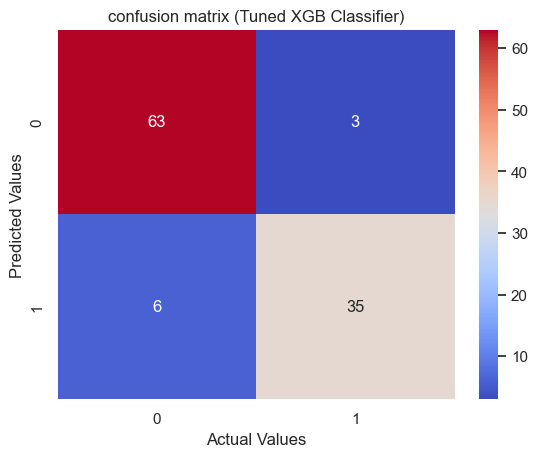

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_pred_best),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix (Tuned XGB Classifier)')
plt.show()

In [76]:
# Visualize Classification report for Tuned XGB Classifier
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        66
           1       0.92      0.85      0.89        41

    accuracy                           0.92       107
   macro avg       0.92      0.90      0.91       107
weighted avg       0.92      0.92      0.92       107



In [77]:
prediction = xgb_model_best.predict(test)
predict_df = pd.DataFrame({'Survived' :prediction})
predict_df.insert(0, 'PassengerId', range(892, 892 + len(predict_df)))

In [78]:
predict_df.to_csv("submission1.csv",header=True, index=False)
predict_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
gb = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.2, 0.1, 0.01],
    'max_depth': [3, 4, 5]

}

grid = GridSearchCV(estimator=gb, cv=5,param_grid= param_grid, verbose=True, n_jobs=-1, scoring='accuracy')

grid.fit(x_train, y_train)

gb_best_params = grid.best_params_

gb_best_model = GradientBoostingClassifier(**gb_best_params)

gb_best_model.fit(x_train, y_train)

model_pred = gb_best_model.predict(x_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [80]:
accuracy = accuracy_score(y_test, model_pred)

print(f'Best Parameters : {gb_best_params}')
print(f'Accuracy : {round(accuracy, 3)}')

Best Parameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy : 0.888


In [81]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [4,8,12],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Initialize the Random Forest Classifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestClassifier(**rf_best_params)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [82]:
accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'R-squared (Tuned Random Forest): {round(accuracy, 3)}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
R-squared (Tuned Random Forest): 0.888


In [84]:
# Initialize the XGB Classifier
model1 = XGBClassifier(**xgb_best_params)
# Initialize the Random Forest Classifier
model2 = RandomForestClassifier( **rf_best_params)

# Create Ensemble Model
ensemble_model = VotingClassifier(estimators=[ ('gb', model1), ('rf', model2)], voting='soft')

# Model Training
ensemble_model.fit(x_train, y_train)

# Predict y_test Values 
y_best_pred = ensemble_model.predict(x_test)

# Evaluate Model Accuracy 
accuracy = accuracy_score(y_test, y_best_pred)
print(f'Ensemble Model : Accuracy = {round(accuracy,3)}')


Ensemble Model : Accuracy = 0.897
